In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pizza_details = pd.read_csv(
    'pizza.csv',
    encoding='latin', index_col = 'order_details_id'
)

In [4]:
pizza_details.head(10)

,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
order_details_id,,,,,,,,,,,
1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
6,2,thai_ckn_l,1,1/1/2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
7,3,ital_supr_m,1,1/1/2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
8,3,prsc_argla_l,1,1/1/2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
9,4,ital_supr_m,1,1/1/2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [5]:
pizza_details['order_date'] = pd.to_datetime(pizza_details['order_date'])
pizza_details['order_time'] = pd.to_datetime(pizza_details['order_time'])
pizza_details['order_week'] = pizza_details['order_date'].dt.isocalendar().week
pizza_details['day'] = pizza_details['order_date'].dt.day_name()
pizza_details['hour'] = pizza_details['order_time'].dt.hour

pizza_details['day'] = pd.Categorical(
    values = pizza_details['day'],
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered = True
)
pizza_details.head(1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_800\374699758.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza_details['order_time'] = pd.to_datetime(pizza_details['order_time'])


,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_week,day,hour
order_details_id,,,,,,,,,,,,,,
1,1,hawaiian_m,1,2015-01-01,2024-10-25 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,Thursday,11


In [6]:
busiest_days = pizza_details.groupby(by = 'day')['quantity'].sum()
type(busiest_days)
df = busiest_days.to_frame().reset_index()

C:\Users\Acer\AppData\Local\Temp\ipykernel_800\2811985936.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  busiest_days = pizza_details.groupby(by = 'day')['quantity'].sum()


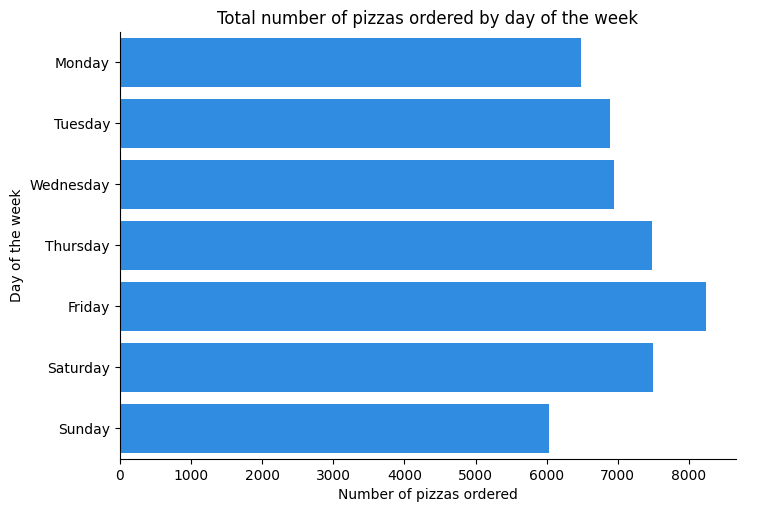

In [7]:
color_graph = '#118DFF'
g = sns.catplot(data = df, x = 'quantity', y = 'day', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Total number of pizzas ordered by day of the week')
g.set(xlabel = 'Number of pizzas ordered', ylabel = 'Day of the week')
plt.show()

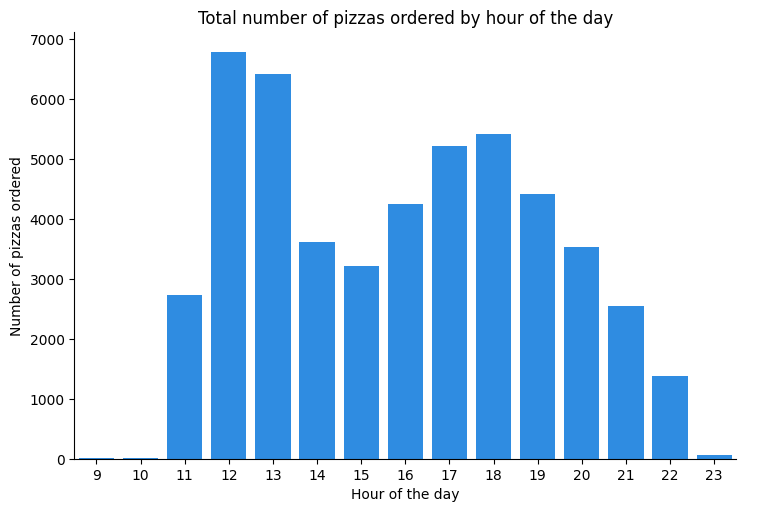

In [8]:
busiest_hours = pizza_details.groupby('hour')['quantity'].sum()
dfh = busiest_hours.to_frame().reset_index()
# dfh.head(10)
g = sns.catplot(data = dfh, x = 'hour', y = 'quantity', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Total number of pizzas ordered by hour of the day')
g.set(xlabel = 'Hour of the day', ylabel = 'Number of pizzas ordered')
plt.show()

In [9]:

pizzas_by_week_day_hour = pizza_details.groupby(['order_week', 'day', 'hour'], as_index = False)['quantity'].sum()
pizzas_by_week_day = pizzas_by_week_day_hour.groupby(['order_week', 'day'], as_index = False)['quantity'].sum()
avg_pizzas_by_day = pizzas_by_week_day.groupby('day', as_index = False)['quantity'].agg({'median': 'median', 'average': 'mean', 'std': 'std'})

C:\Users\Acer\AppData\Local\Temp\ipykernel_800\3900881210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pizzas_by_week_day_hour = pizza_details.groupby(['order_week', 'day', 'hour'], as_index = False)['quantity'].sum()
C:\Users\Acer\AppData\Local\Temp\ipykernel_800\3900881210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pizzas_by_week_day = pizzas_by_week_day_hour.groupby(['order_week', 'day'], as_index = False)['quantity'].sum()
C:\Users\Acer\AppData\Local\Temp\ipykernel_800\3900881210.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

In [10]:
peak_hours = pizza_details['hour'].isin([12, 13, 17, 18])
pizzas_by_week_day_hour_peak = pizza_details[peak_hours].groupby(by = ['order_week', 'day', 'hour'], as_index = False)['quantity'].sum()
pizzas_by_week_day_peak = pizzas_by_week_day_hour_peak.groupby(by = ['order_week', 'day'], as_index = False)['quantity'].sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_800\2398646019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pizzas_by_week_day_hour_peak = pizza_details[peak_hours].groupby(by = ['order_week', 'day', 'hour'], as_index = False)['quantity'].sum()
C:\Users\Acer\AppData\Local\Temp\ipykernel_800\2398646019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pizzas_by_week_day_peak = pizzas_by_week_day_hour_peak.groupby(by = ['order_week', 'day'], as_index = False)['quantity'].sum()


In [11]:
avg_pizzas_by_day_peak = pizzas_by_week_day_peak.groupby(by = 'day', as_index = False)['quantity'].agg({'median_peak': 'median', 'average_peak': 'mean', 'std_peak': 'std'})
avg_pizzas_by_day['median_peak'] = avg_pizzas_by_day_peak['median_peak']
avg_pizzas_by_day['average_peak'] = avg_pizzas_by_day_peak['average_peak']
avg_pizzas_by_day['std_peak'] = avg_pizzas_by_day_peak['std_peak']

C:\Users\Acer\AppData\Local\Temp\ipykernel_800\3553665469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pizzas_by_day_peak = pizzas_by_week_day_peak.groupby(by = 'day', as_index = False)['quantity'].agg({'median_peak': 'median', 'average_peak': 'mean', 'std_peak': 'std'})
C:\Users\Acer\AppData\Local\Temp\ipykernel_800\3553665469.py:1: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  avg_pizzas_by_day_peak = pizzas_by_week_day_peak.groupby(by = 'day', as_index = False)['quantity'].agg({'median_peak': 'median', 'average_peak': 'mean', 'std_peak': 'std'})


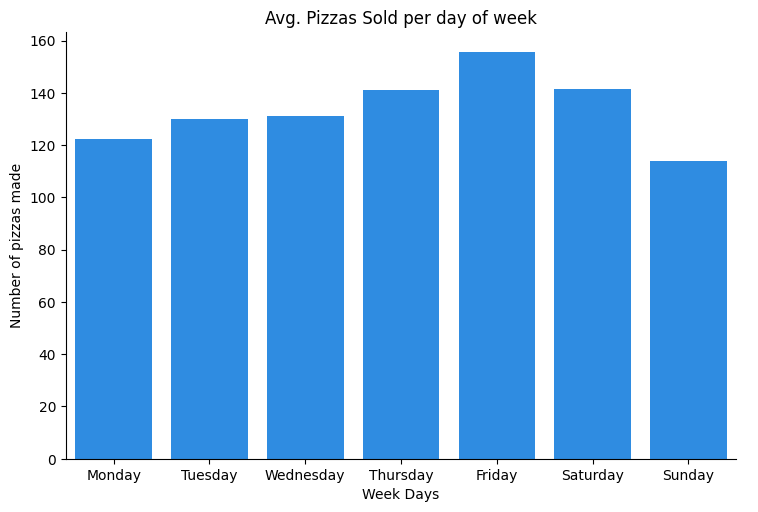

In [12]:
g = sns.catplot(data = avg_pizzas_by_day, x = 'day', y = 'average', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Avg. Pizzas Sold per day of week')
g.set(xlabel = 'Week Days', ylabel = 'Number of pizzas made')
plt.show()

In [13]:
math.floor(pizzas_by_week_day_peak['quantity'].mean())


64

In [14]:
math.floor(pizzas_by_week_day_peak['quantity'].std())

20

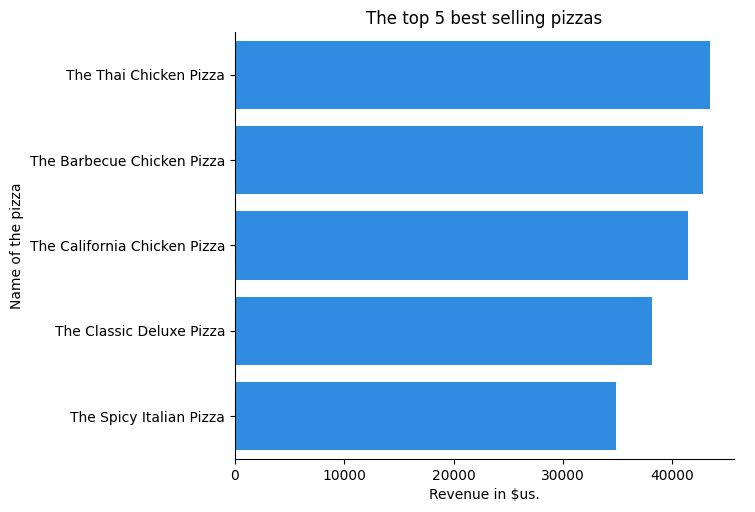

In [15]:
revenue_by_name = pizza_details.groupby(by = 'pizza_name', as_index = False)['total_price'].sum().sort_values(by = 'total_price')
top5_best_selling = revenue_by_name.nlargest(columns = 'total_price', n = 5)
g = sns.catplot(data = top5_best_selling, x = 'total_price', y = 'pizza_name', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'The top 5 best selling pizzas')
g.set(xlabel = 'Revenue in $us.', ylabel = 'Name of the pizza')
plt.show()

In [16]:
top5_best_selling

,pizza_name,total_price
30,The Thai Chicken Pizza,43434.25
0,The Barbecue Chicken Pizza,42768.00
4,The California Chicken Pizza,41409.50
7,The Classic Deluxe Pizza,38180.50
26,The Spicy Italian Pizza,34831.25


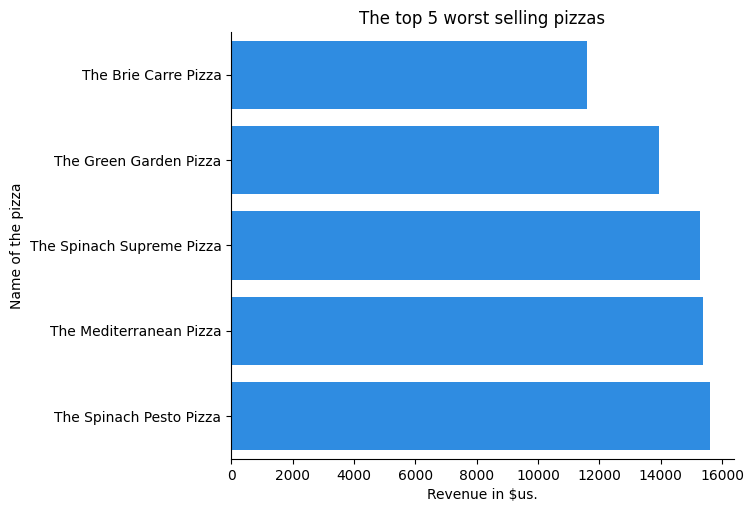

In [17]:
top5_worst_selling = revenue_by_name.nsmallest(n = 5, columns = 'total_price')
g = sns.catplot(data = top5_worst_selling, x = 'total_price', y = 'pizza_name', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'The top 5 worst selling pizzas')
g.set(xlabel = 'Revenue in $us.', ylabel = 'Name of the pizza')
plt.show()


In [18]:
top5_worst_selling

,pizza_name,total_price
2,The Brie Carre Pizza,11588.50
11,The Green Garden Pizza,13955.75
28,The Spinach Supreme Pizza,15277.75
16,The Mediterranean Pizza,15360.50
27,The Spinach Pesto Pizza,15596.00
